In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
x_train = pd.read_csv('Logistic_X_Train.csv')

x_train.head()
x_train = x_train.values

In [3]:
y_train = pd.read_csv('Logistic_Y_Train.csv')
y_train = y_train.values

In [4]:
x_test = pd.read_csv('Logistic_X_Test.csv')
x_test =x_test.values

In [5]:
x_train.shape

(3000, 3)

In [6]:
y_train.shape

(3000, 1)

In [7]:
#y_train.flatten()
print(x_train[1])

[-1.03607028  0.80143631 -1.28371152]


In [51]:
#slpitting data
split = int(0.8 * 3000)
x_tr = x_train[:split,:]
y_tr = y_train[:split,:]

x_val = x_train[split:,:]
y_val = y_train[split:,:]

In [8]:
def hypothesis(x,w,b):
    hx = np.dot(x,w) + b
    return(sigmoid(hx))

w = 2 * np.random.random((3))
b = 5 * np.random.random()

print(w,b)

[1.20551092 0.60836588 0.61541482] 3.6933850840351483


In [9]:
def sigmoid(hx):
    
    return(1.0/(1+np.exp(-1.0*hx)))

In [10]:
def error(x,y,w,b):
    
    err = 0.0
    n = x.shape[0]
    
    for i in range(n):
        
        hx = hypothesis(x[i],w,b)
        err += y[i] * np.log2(hx) + (1 - y[i]) * np.log2(1-hx)
    
    
    return(err/n)


In [11]:
def get_grad(x,y,w,b):
    
    grad_b = 0.0
    grad_w = np.zeros(w.shape)
    n = x.shape[0]
    
    for i in range(n):
        
        hx = hypothesis(x[i],w,b)
        grad_b += (y[i] - hx)
        grad_w += (y[i] - hx) * x[i]
        
    
    return[grad_w/n , grad_b/n]

In [12]:
def gradient_ascent(x,y,w,b,learning_rate = 0.01):
    
    err = error(x,y,w,b)
    [grad_w,grad_b] = get_grad(x,y,w,b)
    
    w += learning_rate * grad_w
    b += learning_rate * grad_b
    
    return(err,w,b)

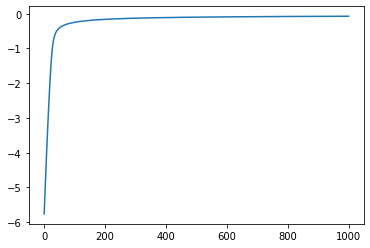

In [52]:
w = 2 * np.random.random((3,))
b = 5 * np.random.random()
loss = []

for i in range(1000):
    
    l,w,b = gradient_ascent(x_tr,y_tr,w,b,learning_rate = 0.1)
    loss.append(l)
    
plt.plot(loss)
plt.show()     

In [45]:
x_train.shape[1]

3

In [46]:
print(w,b)

[127.24323746 118.84819696 103.47514168] [-48.9769137   36.64078382 -45.88991094]


In [47]:
#x_test.reshape((3,3000))
x_test.shape

(1000, 3)

In [48]:
wt = w.flatten
print(wt)

<built-in method flatten of numpy.ndarray object at 0x0000017A47341DA0>


In [54]:
y_val_pred = np.dot(x_val,w) + b

In [63]:
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_val, y_val_pred)
print("mean squared error ", mse)
r2score = r2_score(y_val,y_val_pred)
print(r2score)

mean squared error  20.42151820630508
-81.51118467193972


In [58]:
print(y_val_pred,y_val)

[-2.91739642 -4.13353769 -5.32576638  3.07942893 -3.75075152 -6.0267338
 -5.03590004 -6.99598541  5.53998619 -3.75526665  5.82197028 -6.50008877
  2.9467492  -6.99930609  2.85789432  4.91171873  4.98958505 -3.41804259
 -3.31884709 -3.4760574   3.44261349 -7.22545259  4.15455916  3.4124915
  5.72125759  6.25554296  3.12904145  4.54557736  0.23078912  2.73710883
 -2.31696433  3.37799772  6.67187372 -5.29509368  3.50424613  5.06094602
  5.01856497  5.03164094  3.39996537 -2.69811658  4.54021408 -4.36747005
  4.11455925 -4.98302169  5.12464801 -3.09747585  1.49007996 -6.75892216
  4.70307514  6.03201206 -5.1626804  -6.00488616 -8.69800587 -5.8474362
  5.02049938 -3.32558774 -3.36365999 -6.76893446  4.38874639 -1.60699057
  4.96205773  2.7279834  -4.96106307  5.78885207  2.93117616  3.77125844
  5.87965389 -5.28567195  3.74989355 -5.54700351  5.60164076  3.74059182
  4.89126284 -2.00204123 -7.02234091  5.32906494  2.77287378  3.43430192
  3.99736273  4.27562915  3.96015748 -6.99065525  4.98

In [60]:
y_test = np.dot(x_test,w) + b

In [61]:
y_test

array([  5.36004534,   4.25317691,  -6.39902462,   4.03002241,
         4.60627746,   2.49595673,  -7.7329086 ,   4.32797276,
        -6.74368537,  -3.90633876,  -6.76254245,   3.39704372,
         5.68654931,   3.93280004,   4.03688285,  -5.01707633,
         6.17418965,  -6.00042304,   3.17920115,  -1.45381217,
         2.82580386,  -6.49127321,   3.07151509,  -3.31463239,
         4.47721097,   5.4563088 ,  -1.81478386,  -5.44200491,
        -8.08651576,   4.24053455,   5.05883651,   5.20451398,
         3.14000458,  -5.45386811,  -5.57954614,  -3.89354287,
         4.54311638,  -2.70049429,  -6.56748454,  -4.87698793,
         5.31078175,  -5.42738292,  -3.74607198,  -4.7761476 ,
        -4.10269578,   3.81274609,  -1.818204  ,  -3.49113767,
        -3.40737668,   4.88916791,   3.37186822,   3.67691507,
         3.84943056,   4.56576553,  -5.0441471 ,  -3.53433214,
        -8.27983104,   4.52901083,  -1.56298454,  -7.30641566,
        -7.94456579,   3.58271787,   4.46762849,  -7.51